# Problem Statement 

*Goal It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

# Import Libraries

In [36]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [37]:
trd=pd.read_csv(r"C:\Users\Aishwarya\Downloads\training_set.csv")  # Training Dataset(trd)
trd.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
pd.set_option("display.max_columns",300)

In [39]:
tsd=pd.read_csv(r"C:\Users\Aishwarya\Downloads\testing_set.csv")   #Testing Dataset(tsd)
tsd.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Profile

In [40]:
# Training Info
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
# Testing Info
tsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Missing Data Treatment

In [42]:
trd.Alley = trd.Alley.fillna("None")
trd.BsmtQual = trd.BsmtQual.fillna("None")
trd.BsmtCond = trd.BsmtCond.fillna("None")
trd.BsmtExposure = trd.BsmtExposure.fillna("None")
trd.BsmtFinType1 = trd.BsmtFinType1.fillna("None")
trd.BsmtFinType2 = trd.BsmtFinType2.fillna("None")
trd.FireplaceQu = trd.FireplaceQu.fillna("None")
trd.GarageType = trd.GarageType.fillna("None")
trd.GarageFinish = trd.GarageFinish.fillna("None")
trd.GarageQual = trd.GarageQual.fillna("None")
trd.GarageCond = trd.GarageCond.fillna("None")
trd.PoolQC = trd.PoolQC.fillna("None")
trd.Fence = trd.Fence.fillna("None")
trd.MiscFeature = trd.MiscFeature.fillna("None")

In [43]:
tsd.Alley = tsd.Alley.fillna("None")
tsd.BsmtQual = tsd.BsmtQual.fillna("None")
tsd.BsmtCond = tsd.BsmtCond.fillna("None")
tsd.BsmtExposure = tsd.BsmtExposure.fillna("None")
tsd.BsmtFinType1 = tsd.BsmtFinType1.fillna("None")
tsd.BsmtFinType2 = tsd.BsmtFinType2.fillna("None")
tsd.FireplaceQu = tsd.FireplaceQu.fillna("None")
tsd.GarageType = tsd.GarageType.fillna("None")
tsd.GarageFinish = tsd.GarageFinish.fillna("None")
tsd.GarageQual = tsd.GarageQual.fillna("None")
tsd.GarageCond = tsd.GarageCond.fillna("None")
tsd.PoolQC = tsd.PoolQC.fillna("None")
tsd.Fence = tsd.Fence.fillna("None")
tsd.MiscFeature = tsd.MiscFeature.fillna("None")

In [44]:
trd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [45]:
tsd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

# CatCon

In [46]:
con=[]
cat=[]
for i in trd.columns:
    if(trd[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [47]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [48]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [49]:
con.remove("SalePrice")

In [50]:
Q = list(trd[con].nunique().sort_values().index[0:15])

In [51]:
for i in Q:
    cat.append(i)
    con.remove(i)

In [52]:
for i in cat:
    x = trd[i].mode()[0]
    trd[i] = trd[i].fillna(x)
    tsd[i] = tsd[i].fillna(x)
    
for i in con:
    x = trd[i].mean()
    trd[i] = trd[i].fillna(x)
    tsd[i] = tsd[i].fillna(x)

In [53]:
trd.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [54]:
tsd.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# Outliers

In [55]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(trd[con]),columns=con)

out = []
for i in con:
    out = out + list(X1[(X1[i]>3)|(X1[i]<-3)].index)
    
from numpy import unique
outliers = list(unique(out))


In [56]:
trd = trd.drop(index=out,axis=0)

In [57]:
trd.shape

(1167, 81)

In [58]:
tsd.shape

(1459, 80)

In [59]:
trd.index=range(0,trd.shape[0],1)

In [60]:
trd

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
4,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,1453,180,RM,35.0,3675,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,None,Basment,2005.000000,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,None,None,None,0,5,2006,WD,Normal,145000
1163,1454,20,RL,90.0,17217,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,None,None,1978.506164,None,0,0,None,None,Y,36,56,0,0,0,0,None,None,None,0,7,2006,WD,Abnorml,84500
1164,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,None,Attchd,2004.000000,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,None,None,None,0,10,2009,WD,Normal,185000
1165,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,Comp

In [61]:
trd.shape

(1167, 81)

# Exploratory Data Analysis(EDA)

In [62]:
Q = pd.DataFrame(trd.corr()['SalePrice'].sort_values())
imp_cons = list(Q[(Q.SalePrice>0.1)|(Q.SalePrice<-0.1)][Q.SalePrice!=1].index)

In [63]:
len(cat)

58

In [64]:
73/4

18.25

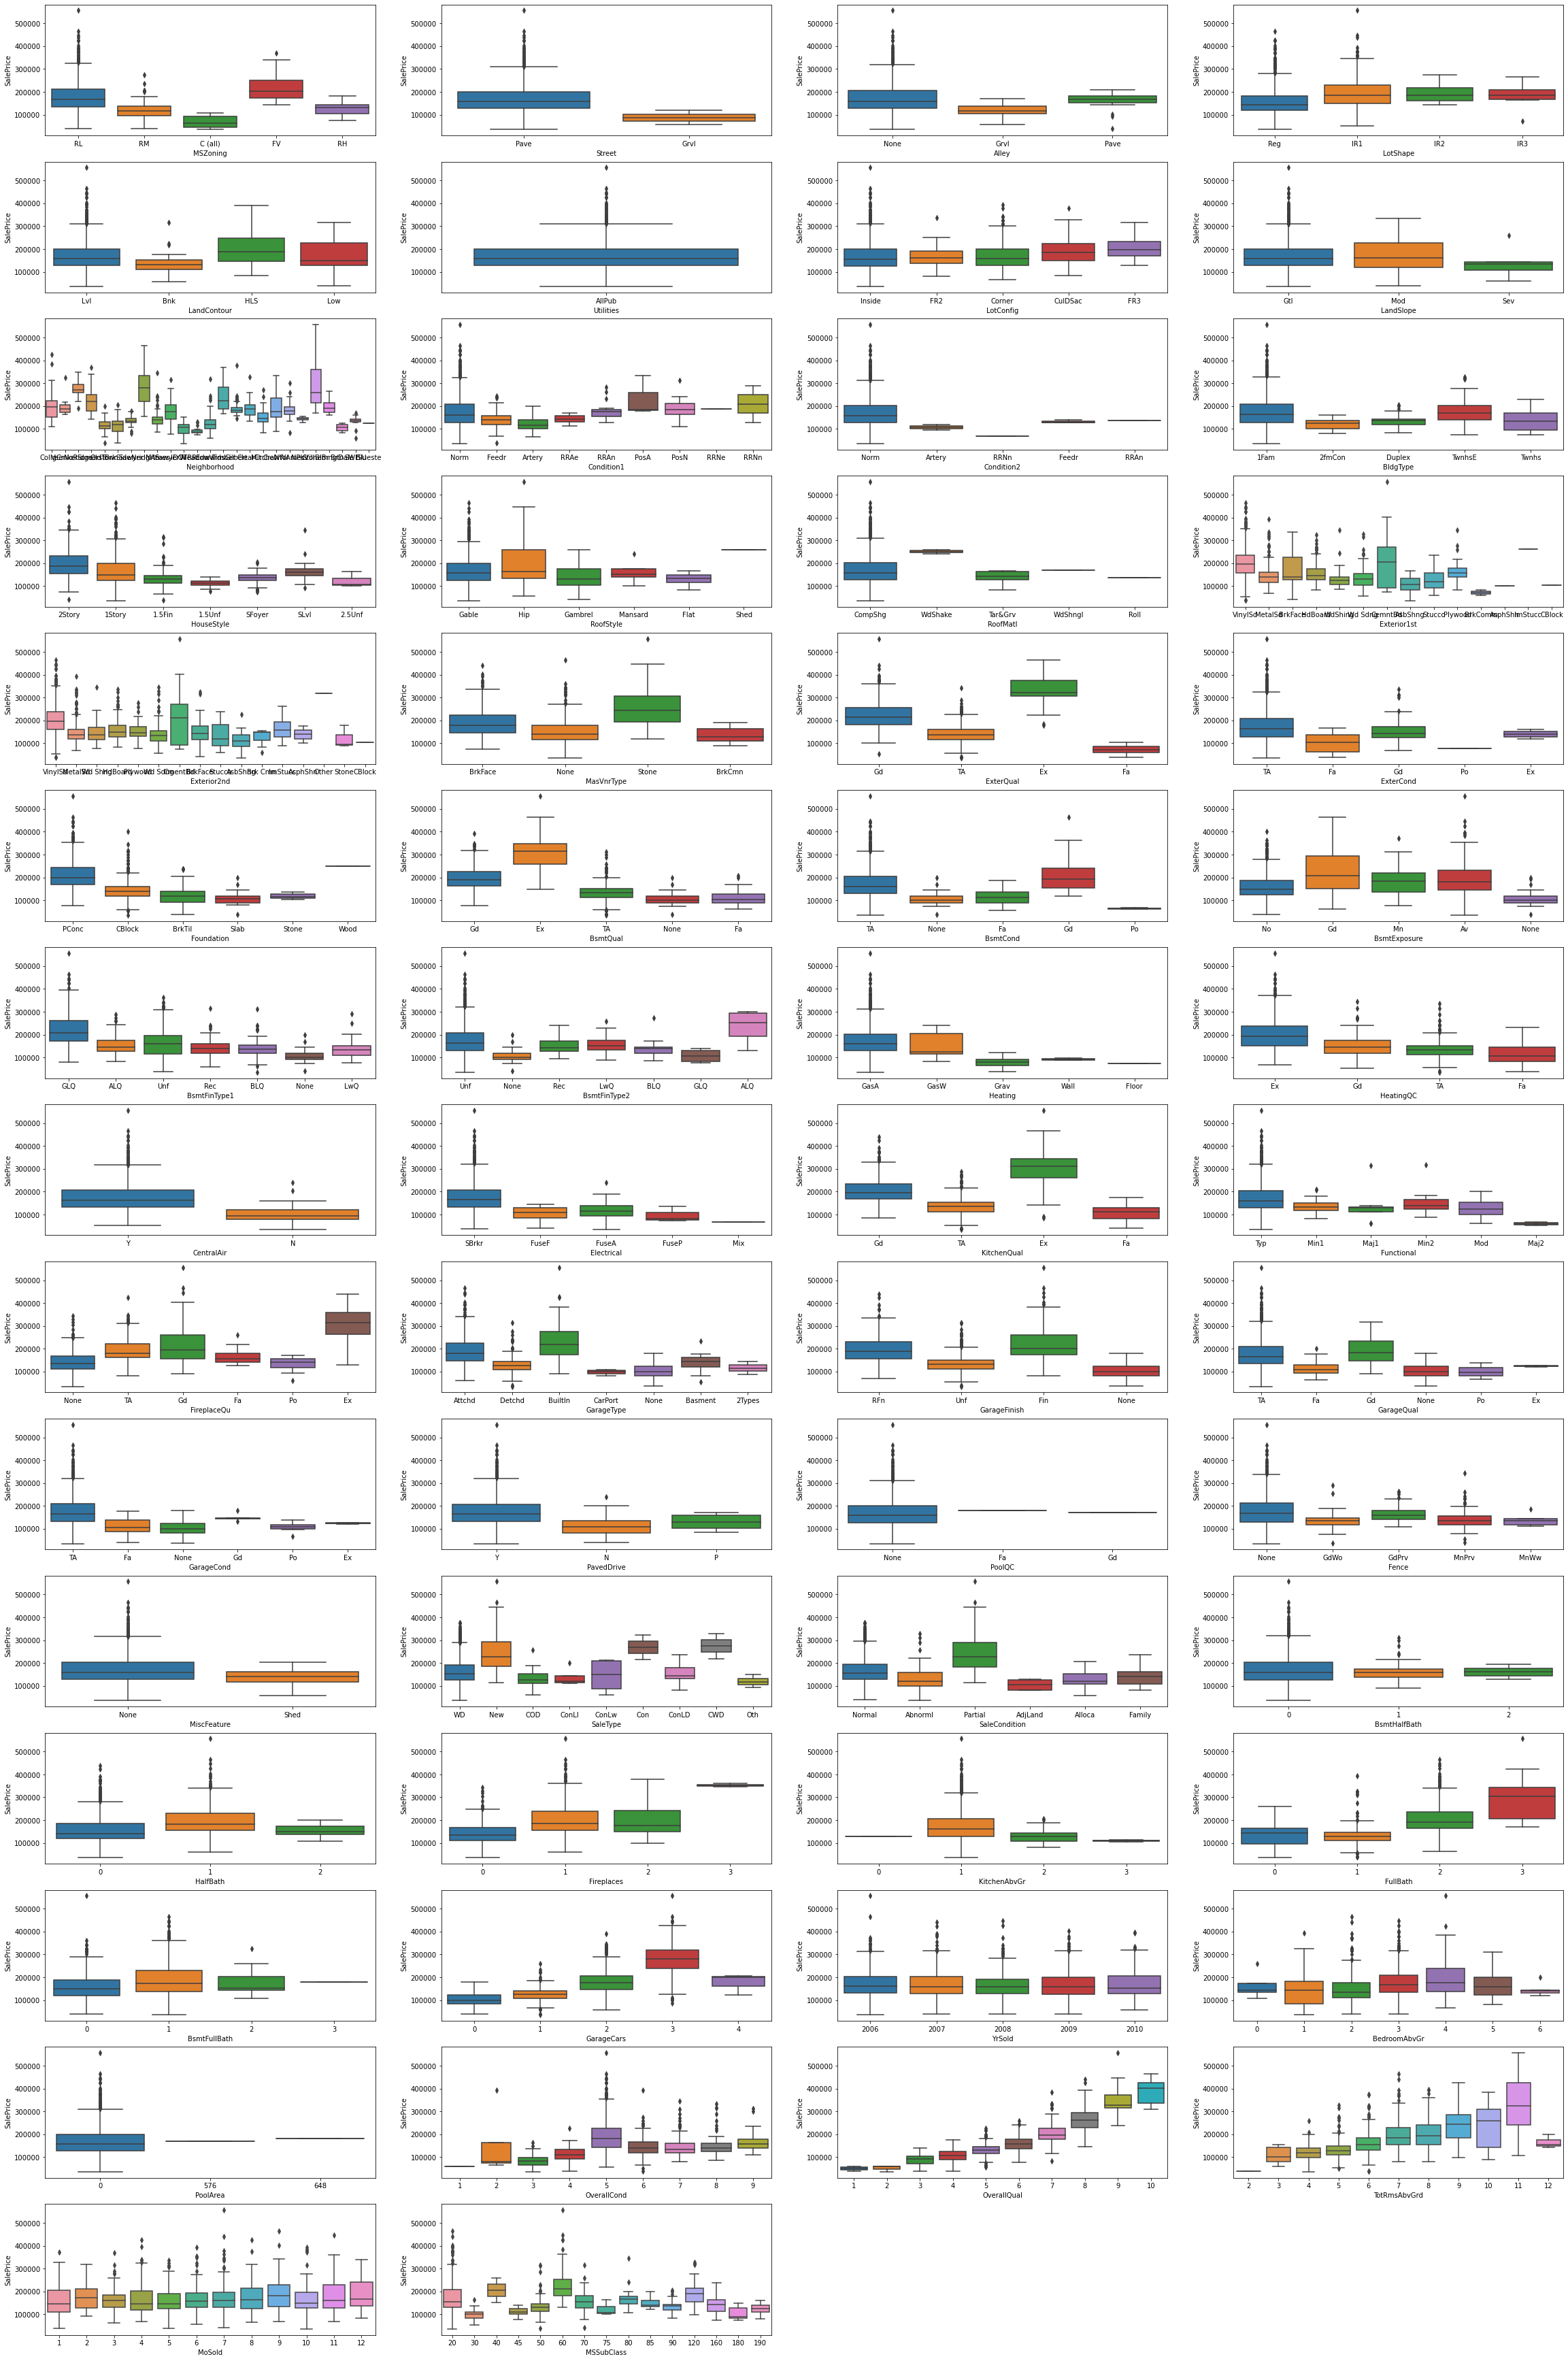

In [65]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(40,80))
x = 0
for i in cat:
    x = x + 1
    plt.subplot(19,4,x)
    sb.boxplot(trd[i],trd.SalePrice)

# Data Preperation

In [66]:
trd[con].head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0
3,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0
4,7,75.0,10084,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,2004.0,636,255,57,0,0,0,0


In [67]:
trd[cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,BsmtHalfBath,HalfBath,Fireplaces,KitchenAbvGr,FullBath,BsmtFullBath,GarageCars,YrSold,BedroomAbvGr,PoolArea,OverallCond,OverallQual,TotRmsAbvGrd,MoSold,MSSubClass
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,0,1,0,1,2,1,2,2008,3,0,5,7,8,2,60
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,1,0,1,1,2,0,2,2007,3,0,8,6,6,5,20
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,0,1,1,1,2,1,2,2008,3,0,5,7,6,9,60
3,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,0,1,1,1,2,1,3,2008,4,0,5,8,9,12,60
4,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,0,0,1,1,2,1,2,2007,3,0,5,8,7,8,20


In [68]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(trd[con]),columns=con)
X2 = pd.get_dummies(trd[cat])
Xnew = X1.join(X2)

X11 = pd.DataFrame(ss.transform(tsd[con]),columns=con)
X21 = pd.get_dummies(tsd[cat])
Xnew_test = X11.join(X21)

In [69]:
len(X2.columns),len(X21.columns)

(265, 263)

In [70]:
Xnew_test[Xnew.columns]

KeyError: "['Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Heating_Floor', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa'] not in index"

In [71]:
# Equal columns in training and testing
Q = ['Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Heating_Floor', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa']

In [72]:
for i in Q:
    Xnew_test[i]=0

In [73]:
#Xnew_test[Xnew.columns]

# Splitting

In [74]:
Y = trd[["SalePrice"]]
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Regression Models

In [75]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
tr_err,ts_err

(214420245.5, 1.2801418258992811e+23)

# Backward Elemination OLS Model

In [76]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst).fit()

In [77]:
#ols.summary()

In [78]:
rsq = round(ols.rsquared_adj,4)

In [79]:
col_to_drop = ols.pvalues.sort_values().index[-1]

In [80]:
RS = []
for i in range(0,169,1):
    Xnew = Xnew.drop(labels=col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    from statsmodels.api import add_constant,OLS
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst).fit()
    rsq = round(ols.rsquared_adj,4)
    RS.append(rsq)
    col_to_drop = ols.pvalues.sort_values().index[-1]
    if(col_to_drop=="const"):
        col_to_drop = ols.pvalues.sort_values().index[-2]
    else:
        col_to_drop = ols.pvalues.sort_values().index[-1]
    print(i,col_to_drop,ols.rsquared_adj)

0 Electrical_Mix 0.9327509064938833
1 Neighborhood_SawyerW 0.932750906493883
2 Exterior1st_WdShing 0.932750906493883
3 Electrical_FuseP 0.9327509064938833
4 FireplaceQu_Fa 0.9328466502923897
5 SaleCondition_Partial 0.9328466502923897
6 Neighborhood_IDOTRR 0.9328466502923897
7 BsmtFinSF2 0.9329420935898436
8 Condition2_RRAn 0.9329420935898436
9 Exterior2nd_Brk Cmn 0.9329420935898436
10 Exterior2nd_Wd Shng 0.9329420935898436
11 Exterior2nd_BrkFace 0.9330373461568495
12 Functional_Maj2 0.9331322789686979
13 BsmtCond_Gd 0.9331322789686979
14 ExterCond_Gd 0.9331322789686979
15 Neighborhood_Timber 0.9331322789686979
16 BsmtExposure_None 0.9332266597395872
17 Exterior1st_HdBoard 0.9332266597395872
18 SaleType_Oth 0.9333205753406508
19 BsmtFinType1_LwQ 0.9333205753406508
20 RoofStyle_Hip 0.9333205753406508
21 GarageCond_Fa 0.933320575340651
22 Neighborhood_Blueste 0.9333205753406508
23 BsmtCond_TA 0.9334135514698332
24 BsmtUnfSF 0.9335059325043809
25 Heating_Floor 0.9335977020987315
26 Heating

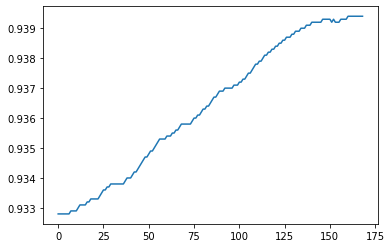

In [81]:
import matplotlib.pyplot as plt
plt.plot(RS)

In [82]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
tr_err,ts_err

(226128723.18, 521072192.29)

In [83]:
def modeller(mo):
    model = mo.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    return tr_err,ts_err

In [84]:
modeller(lm)

(226128723.18, 521072192.29)

# Regularize

In [85]:
from sklearn.linear_model import Ridge,Lasso

# Ridge

In [86]:
rr = Ridge(alpha=1)
modeller(rr)

(235804347.45, 488489982.89)

In [87]:
q = 0.0
alphas = []
for i in range(0,500):
    q = round(q + 0.1,2)
    alphas.append(q)

In [88]:
tr = []            #Model on ridge regression.
ts = []
for i in alphas:
    rr = Ridge(alpha=i)
    tr_err,ts_err = modeller(rr)
    tr.append(tr_err)
    ts.append(ts_err)

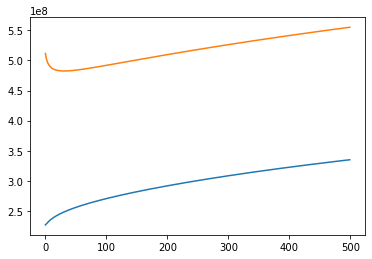

In [89]:
plt.plot(tr)
plt.plot(ts)

# Lasso

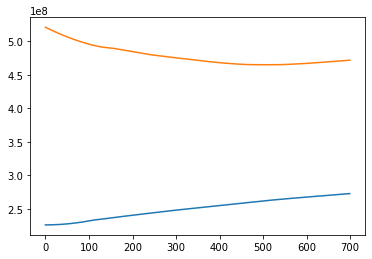

In [90]:
q = 0.0  #Model on lasso regression.
alphas = []
for i in range(0,700):
    q = round(q + 0.1,2)
    alphas.append(q)

tr = []
ts = []
for i in alphas:
    ls = Lasso(alpha=i)
    tr_err,ts_err = modeller(ls)
    tr.append(tr_err)
    ts.append(ts_err)
plt.plot(tr)
plt.plot(ts)

In [91]:
521072192.29 - 226128723.18

294943469.11

In [92]:
alphas[500]

50.1

In [93]:
ls = Lasso(alpha=50.1)
modeller(ls)

(261836353.1, 464790723.03)

In [94]:
464790723.03 - 261836353.1

202954369.92999998

In [95]:
294943469 - 202954369

91989100

# Cross Validation

In [97]:
from sklearn.model_selection import GridSearchCV
ls = Lasso()
tg = {"alpha":alphas}

cv = GridSearchCV(ls,tg,scoring="neg_mean_squared_error",cv=5)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 70.0}

# Final Model

In [98]:
ls = Lasso(alpha=70.0)
model = ls.fit(Xnew,Y)

# Data Preperation For Prediction

In [99]:
final_df_pred = Xnew_test[Xnew.columns]

In [100]:
pred = model.predict(final_df_pred)

In [101]:
Q = tsd[["Id"]]
Q['SalePrice']=pred

In [102]:
Q

,Id,SalePrice
0,1461,115649.763963
1,1462,166036.389630
2,1463,189131.086730
3,1464,203000.700020
4,1465,202374.227260
...,...,...
1454,2915,86750.941776
1455,2916,77993.137754
1456,2917,174482.984017
1457,2918,112428.582592
